<a href="https://colab.research.google.com/github/ginaazambrano/IA2023-2GINA_ZAMBRANO/blob/main/_prueba2pandas_exercise_b_for_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import pandas as pd and load the dataset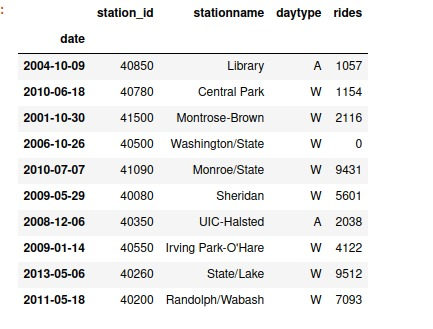

In [1]:
# Use this line to load the dataset.
url='https://github.com/Sinchiguano/chicagoUniversity/blob/main/Station_Entries_Daily_Totals.csv'
# your code here
pass


In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/Station_Entries_Daily_Totals.csv'
df = pd.read_csv(url)
print(df.head(10))

   station_id               stationname        date daytype  rides
0       41280            Jefferson Park  12/22/2017       W   6104
1       41000          Cermak-Chinatown  12/18/2017       W   3636
2       40280              Central-Lake  12/02/2017       A   1270
3       40140           Dempster-Skokie  12/19/2017       W   1759
4       40690                  Dempster  12/03/2017       U    499
5       41660                Lake/State  12/30/2017       A   8615
6       40180      Oak Park-Forest Park  12/17/2017       U    442
7       40250  Kedzie-Homan-Forest Park  12/02/2017       A   1353
8       40120               35th/Archer  12/07/2017       W   3353
9       41420        Addison-North Main  12/19/2017       W   6034


Basic Exploration

Let's first take a quick look at what this data looks like.

In [4]:
# for basic exploration, we suggest to use shape, head(), tail(), dtypes, type() modules
# your code here
print(df.tail(10))

         station_id        stationname        date daytype  rides
1158446       41700  Washington/Wabash  03/22/2023       W   5972
1158447       41700  Washington/Wabash  03/23/2023       W   5856
1158448       41700  Washington/Wabash  03/24/2023       W   5530
1158449       41700  Washington/Wabash  03/25/2023       A   3215
1158450       41700  Washington/Wabash  03/26/2023       U   2965
1158451       41700  Washington/Wabash  03/27/2023       W   5787
1158452       41700  Washington/Wabash  03/28/2023       W   6208
1158453       41700  Washington/Wabash  03/29/2023       W   6188
1158454       41700  Washington/Wabash  03/30/2023       W   6118
1158455       41700  Washington/Wabash  03/31/2023       W   5556


What are some basic statistics about the data?

In [5]:
# use the describe module
# your code here
# Utilizar el método describe() para obtener estadísticas básicas del conjunto de datos
statistics = df.describe()

# Mostrar las estadísticas
print(statistics)

         station_id         rides
count  1.158456e+06  1.158456e+06
mean   4.076671e+04  3.041143e+03
std    4.491984e+02  3.108889e+03
min    4.001000e+04  0.000000e+00
25%    4.037000e+04  9.570000e+02
50%    4.076000e+04  1.990000e+03
75%    4.115000e+04  4.004000e+03
max    4.170000e+04  3.632300e+04


Selection Based on Conditionals

Let's see which stations have the most and fewest rides.

In [6]:
filtered_df = df[df['rides'] == 2858]

# Mostrar las primeras filas del DataFrame filtrado
print(filtered_df.head())


       station_id     stationname        date daytype  rides
96          40540          Wilson  12/17/2017       U   2858
134         41310         Paulina  12/08/2017       W   2858
1496        41500  Montrose-Brown  12/04/2017       W   2858
5736        41500  Montrose-Brown  03/07/2018       W   2858
21141       41240  Addison-O'Hare  06/25/2018       W   2858


In [16]:
# use the min() and max() modules
# your code here
min_values = df.min()

# Obtener el valor máximo para cada columna
max_values = df.max()
print("Minimum values:")
print(min_values)

# Mostrar los valores máximos
print("\nMaximum values:")
print(max_values)

Minimum values:
station_id     40010
stationname     18th
daytype            A
rides              0
dtype: object

Maximum values:
station_id      41700
stationname    Wilson
daytype             W
rides           36323
dtype: object


Create a Time Index

So we have all rides from January 1, 2001 to December 31, 2019. Let's do some statistics that group ride statistics by date. First we need to tell Pandas that the date column is in fact a date. So, we convert the column to a proper 'DateTime' type, and then set the index to this column.

This step takes a little bit of time!

The following picture show the desired outp

In [9]:
# hint, use to_datetime() and set_index()  modules
# your code here
df = pd.read_csv(url, parse_dates=['date'])

# Establecer la columna de fecha como índice
df.set_index('date', inplace=True)

# Mostrar las primeras filas del DataFrame actualizado
print(df.head())

            station_id       stationname daytype  rides
date                                                   
2017-12-22       41280    Jefferson Park       W   6104
2017-12-18       41000  Cermak-Chinatown       W   3636
2017-12-02       40280      Central-Lake       A   1270
2017-12-19       40140   Dempster-Skokie       W   1759
2017-12-03       40690          Dempster       U    499


Sort the Dataframe by Date

In [10]:
# hint, sort_values(by='date')
# your code here
df_sorted = df.sort_values(by='date')

# Mostrar las primeras filas del DataFrame ordenado
print(df_sorted.head())

            station_id         stationname daytype  rides
date                                                     
2001-01-01       40990                69th       U   2366
2001-01-01       40980  Harlem-Forest Park       U    173
2001-01-01       40810      Medical Center       U    479
2001-01-01       40470              Racine       U    286
2001-01-01       40790     Monroe/Dearborn       U    342


Sanity Checking

Looks good! Now let's have a quick look at data for specific stations: 'Morgan-Lake' and 'Addison-Brown'

In [11]:
# hint, use filter like, df['stationname']=='Morgan-Lake']
# your code here
# use the following variable name for your specific stations
Morgan_Lake=pd.DataFrame()
morgan_lake_df = df[df['stationname'] == 'Morgan-Lake']

# Filtrar el DataFrame para la estación 'Addison-Brown'
addison_brown_df = df[df['stationname'] == 'Addison-Brown']

# Mostrar las primeras filas de los DataFrames filtrados
print("Data for 'Morgan-Lake':")
print(morgan_lake_df.head())

print("\nData for 'Addison-Brown':")
print(addison_brown_df.head())

Data for 'Morgan-Lake':
            station_id  stationname daytype  rides
date                                              
2017-12-22       41510  Morgan-Lake       W   2425
2017-12-06       41510  Morgan-Lake       W   3045
2017-12-02       41510  Morgan-Lake       A   1947
2017-12-15       41510  Morgan-Lake       W   2978
2017-12-23       41510  Morgan-Lake       A   1290

Data for 'Addison-Brown':
            station_id    stationname daytype  rides
date                                                
2017-12-06       41440  Addison-Brown       W   2699
2017-12-21       41440  Addison-Brown       W   2437
2017-12-18       41440  Addison-Brown       W   2477
2017-12-11       41440  Addison-Brown       W   2512
2017-12-14       41440  Addison-Brown       W   2640


In [12]:
# hint, use filter like this df['stationname']=='Addison-Brown']
# your code here
# use the following variable name for your specific stations
Addison_Brown=pd.DataFrame()
morgan_lake_df = df[df['stationname'] == 'Morgan-Lake']

# Filtrar el DataFrame para la estación 'Addison-Brown'
addison_brown_df = df[df['stationname'] == 'Addison-Brown']

# Mostrar las primeras filas de los DataFrames filtrados
print("Data for 'Morgan-Lake':")
print(morgan_lake_df.head())

print("\nData for 'Addison-Brown':")
print(addison_brown_df.head())

Data for 'Morgan-Lake':
            station_id  stationname daytype  rides
date                                              
2017-12-22       41510  Morgan-Lake       W   2425
2017-12-06       41510  Morgan-Lake       W   3045
2017-12-02       41510  Morgan-Lake       A   1947
2017-12-15       41510  Morgan-Lake       W   2978
2017-12-23       41510  Morgan-Lake       A   1290

Data for 'Addison-Brown':
            station_id    stationname daytype  rides
date                                                
2017-12-06       41440  Addison-Brown       W   2699
2017-12-21       41440  Addison-Brown       W   2437
2017-12-18       41440  Addison-Brown       W   2477
2017-12-11       41440  Addison-Brown       W   2512
2017-12-14       41440  Addison-Brown       W   2640


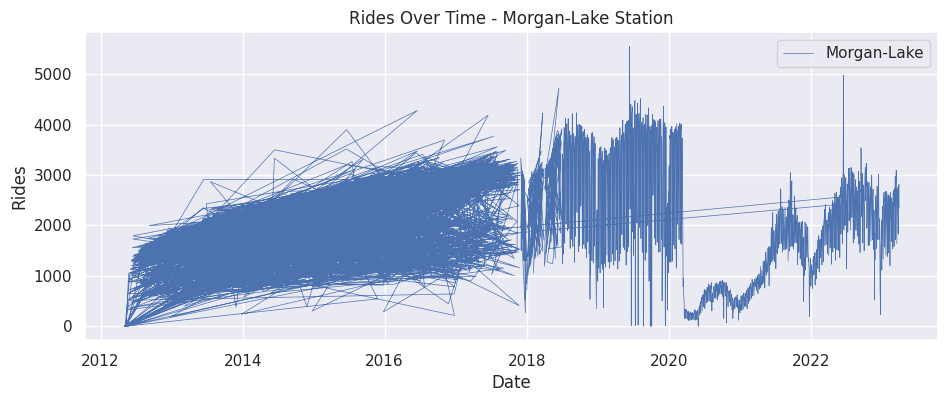

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del tamaño de la figura
sns.set(rc={'figure.figsize':(11, 4)})

# Gráfico de la serie temporal para la estación 'Morgan-Lake'
plt.plot(morgan_lake_df.index, morgan_lake_df['rides'], linewidth=0.5, label='Morgan-Lake')

# Añadir etiquetas y título
plt.xlabel('Date')
plt.ylabel('Rides')
plt.title('Rides Over Time - Morgan-Lake Station')
plt.legend()  # Muestra la leyenda

# Mostrar el gráfico
plt.show()


In [17]:
sns.set(rc={'figure.figsize':(11, 4)})

pass